<a href="https://colab.research.google.com/github/repsuco/wotechfox/blob/main/titanic_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# read in the content from the file (a few rows)

titanic_train_df = pd.read_csv('/content/train.csv')
titanic_train_df.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
# how many rows and columns are in this dataframe?

rows, columns = titanic_train_df.shape
print(f'Number of rows is {rows}, number of columns is {columns}')

Number of rows is 891, number of columns is 12


In [12]:
# what is the maximum age of a passanger who was onboard?

titanic_train_df['Age'].max() # the highest value
titanic_train_df['Age'].idxmax() # index of the highest value

max_age = titanic_train_df['Age'].iloc[titanic_train_df['Age'].idxmax()] #iloc index location
print('The oldest passenger onboard was:', max_age)

The oldest passenger onboard was: 80.0


In [14]:
# what is the minumum age of a passanger who was onboard?

titanic_train_df['Age'].min() # the highest value
titanic_train_df['Age'].idxmin() # index of the highest value

min_age = titanic_train_df['Age'].iloc[titanic_train_df['Age'].idxmin()] #iloc index location
print('The youngest passenger onboard was:', min_age)

The youngest passenger onboard was: 0.42


In [15]:
# how many passengers onboard were younger than 8 years old?

age_lower_than_8 = titanic_train_df[titanic_train_df['Age'] < 8]
print(len(age_lower_than_8))

50


In [19]:
# check if Guggenheim was on the list

filtered_names = titanic_train_df[titanic_train_df['Name'].str.startswith('Gu', na=False)]

for name in filtered_names['Name']:
    print(name)

Gustafsson, Mr. Anders Vilhelm
Gustafsson, Mr. Karl Gideon
Gustafsson, Mr. Johan Birger
Guggenheim, Mr. Benjamin
Gustafsson, Mr. Alfred Ossian


In [24]:
# check if Guggenheim survived

guggenheim_data = titanic_train_df[titanic_train_df['Name'].str.contains('Guggenheim', case=False, na=False)]

if not guggenheim_data.empty:
    for index, row in guggenheim_data.iterrows():
        name = row['Name']
        survived = 'Yes' if row['Survived'] == 1 else 'No'
        print(f"Name: {name}, Survived: {survived}")
else:
    print("No entries for Guggenheim found.")

Name: Guggenheim, Mr. Benjamin, Survived: No


In [21]:
# get value counts for the 'sex' column / number of men and women onboard

gender_counts = titanic_train_df['Sex'].value_counts()

print(gender_counts)

Sex
male      577
female    314
Name: count, dtype: int64


In [30]:
# get info how many people did embark from each port

cherbourg_count = titanic_train_df[titanic_train_df['Embarked'] == 'C'].shape[0]
southampton_count = titanic_train_df[titanic_train_df['Embarked'] == 'S'].shape[0]
queenstown_count = titanic_train_df[titanic_train_df['Embarked'] == 'Q'].shape[0]


# print the number of people who embarked from each port

print(f'Number of people who embarked from Cherbourg, France: {cherbourg_count}')
print(f'Number of people who embarked from Southampton, England: {southampton_count}')
print(f'Number of people who embarked from Queenstown, Ireland: {queenstown_count}')


Number of people who embarked from Cherbourg, France: 168
Number of people who embarked from Southampton, England: 644
Number of people who embarked from Queenstown, Ireland: 77


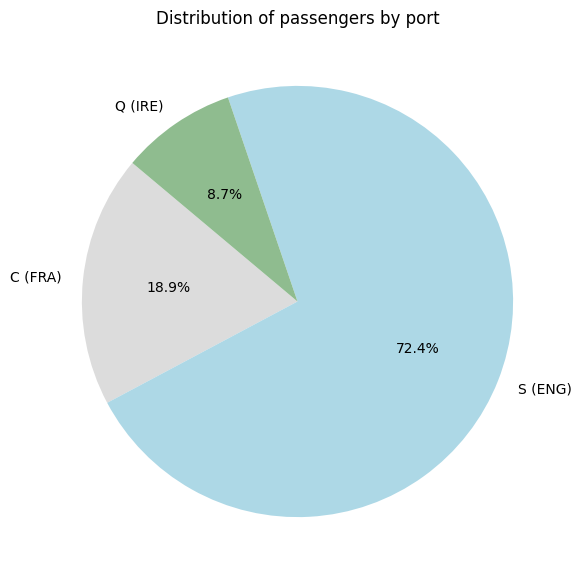

In [38]:
# PIE CHART

ports = {'Category': ['C (FRA)', 'S (ENG)', 'Q (IRE)'], 'Values': [168, 644, 77]}

categories = ports['Category']
values = ports['Values']

# create the chart
plt.figure(figsize=(7, 7))
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=['gainsboro', 'lightblue', 'darkseagreen'], startangle=140)

plt.title('Distribution of passengers by port')

plt.show()

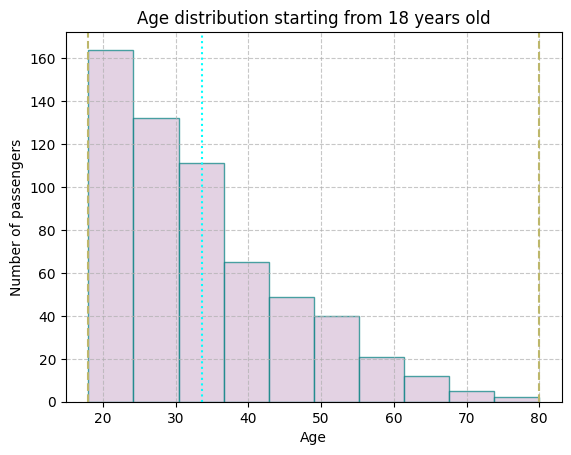

In [23]:
# filter out people younger than 18
filtered_passengers_df = titanic_train_df[titanic_train_df['Age'] >= 18]

# plot histogram for filtered passengers
plt.hist(filtered_passengers_df['Age'], color='thistle', edgecolor='teal', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of passengers')

# average line for filtered passengers
plt.axvline(filtered_passengers_df['Age'].mean(), linestyle='dotted', color='cyan')

# minimum line for filtered passengers
plt.axvline(filtered_passengers_df['Age'].min(), linestyle='dashed', color='darkkhaki')

# maximum line for filtered passengers
plt.axvline(filtered_passengers_df['Age'].max(), linestyle='dashed', color='darkkhaki')

plt.grid(linestyle='--', alpha=0.7)
plt.title('Age distribution starting from 18 years old')
plt.show()